<a href="https://colab.research.google.com/github/Tks1aol/public_intro_to_DS_mba_hse/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Задание 1 (1 балл): предобработка данных
Откройте предложенные данные.

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/marketing.csv", sep = ';', index_col='ID')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 1826 to 4070
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Year_Birth           2240 non-null   int64 
 1   Education            2240 non-null   object
 2   Marital_Status       2240 non-null   object
 3   Income               2216 non-null   object
 4   Kidhome              2240 non-null   int64 
 5   Teenhome             2240 non-null   int64 
 6   Dt_Customer          2240 non-null   object
 7   Recency              2240 non-null   int64 
 8   MntWines             2240 non-null   int64 
 9   MntFruits            2240 non-null   int64 
 10  MntMeatProducts      2240 non-null   int64 
 11  MntFishProducts      2240 non-null   int64 
 12  MntSweetProducts     2240 non-null   int64 
 13  MntGoldProds         2240 non-null   int64 
 14  NumDealsPurchases    2240 non-null   int64 
 15  NumWebPurchases      2240 non-null   int64 
 16  Num

Изучите ваши данные. Какие типы данных здесь представлены? Все ли данные считались в корректном и удобном для работы формате? Если нет, то с какими данными есть проблемы?

Представлены типы данных int64 (целое число) и object (общий тип). Не все представлены в удобном виде: Income удобнее в float, Dt_Customer удобнее в pandas.datetime. 

Теперь необходимо привести некоторые данные в корректный вид. Преобразуйте признак income так, чтобы значения этого признака были обычными вещественными числами (float)

In [ ]:
def clean_cur(x):
  if isinstance(x, str):
    return(x.replace('$', '').replace(',',''))
  return(x)

In [ ]:
df['Income'] = df['Income'].apply(clean_cur).astype('float')

Кроме того, даты нам было бы удобнее представить в корректном формате ГГГГ-ММ-ДД. Преобразуйте данные с датами в соответствующий вид.

In [ ]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

Задание 2 (1.5 балла): пропуски и выбросы
Исследуйте данные на предмет пропусков и выбросов. Есть ли в данных пропуски? Сколько и в каких признаках? Как вы будете их обрабатывать? Обработайте пропуски, пояснив выбранную вами стратегию обработки.

важно: просто удалить - это не стратегия обработки, придумайте что-то другое

In [ ]:
df.isna().sum()

В переменной Income 24 пропуска.

In [ ]:
df.fillna(df.median(), inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Заполним пропуски медианой. Была выбрана медиана, а не среднее арифметичкое для того, чтобы крайние значения не исказили выборку.

Исследуйте данные на предмет выбросов и удалите их, если они есть. Если выбросы есть - продемонстрируйте это численно и с помощью визуализаций. Прокомментируйте, как вы ищете выбросы, и почему их стоит удалить.

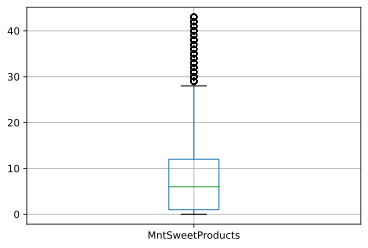

In [ ]:
# визуализируем выбросы
# quant_vars = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'age_sq']
# pd.DataFrame(df['MntWines']).boxplot()
# pd.DataFrame(df['MntFruits']).boxplot()
# pd.DataFrame(df['MntMeatProducts']).boxplot()
pd.DataFrame(df['MntSweetProducts']).boxplot()
# pd.DataFrame(df['MntGoldProds']).boxplot()

Поиск выбросов имеет смысл только по количественным, а не бинарным переменным. Поиск выбросов будем производить с помощью IQR. Выбросы необходимо удалять, так как выбросы искажают данные: сдвигается среднее значение, распределение данных становится ненормальным, что влечет проблемы для проведения статистических тестов при диагностике регрессионной модели, а также получаемые оценки модели становятся смещенными.

In [ ]:
# удаляем выбросы (код заимствован отсюда https://www.askpython.com/python/examples/detection-removal-outliers-in-python)
import numpy as np

quant_vars = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'age_sq']
for x in df[quant_vars]:
  q75, q25 = np.percentile(df.loc[:,x], [75, 25])
  iqr = q75 - q25

  max = q75 + (1.5*iqr)
  min = q25 - (1.5*iqr)

  df.loc[df[x] < min, x] = np.nan
  df.loc[df[x] > max, x] = np.nan

In [ ]:
df.fillna(df.median(), inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Задание 3 (1 балл): новые признаки
Подумайте, какие осмысленные признаки можно создать из имеющихся? Придумайте как минимум 2 и добавьте их, содержательно описав, почему вы их добавляете и по какому принципу.

Одной из новых переменных будет квадрат возраста, которы рассчитаем на основе года рождения. Данная переменная часто добавляется в различные модели, описывающие поведение клиентов, так как влияние возраста может иметь нелинейный характер (например, можно предположить, что до 35-40 лет кредитоспсобность людей растет, при этом после некоторого возраста она наоборот снижается). 

In [ ]:
import datetime

cur_date = datetime.datetime.today()
df['age_sq'] = (cur_date.year - df['Year_Birth'])**2

Также часто создаются переменные, показывающие взаимодействие между имеющимися в дата-сете переменными, в частности какой-либо бинарной и количественной. В данном случае, уместно предположить, что доход человека, принявшего предложение в последеней кампании, может оказывать на зависимую переменную более сильное влияние, поэтому введем переменную Inc_resp = Income*Response 

In [ ]:
df['Inc_resp'] = df['Income'] * df['Response']

Задание 4 (2.5 балла): время статистики!
Рассчитайте все описательные статистики для категориальных переменных (есть специальный метод, который выводит все доступные статистики разом - это то, что нужно!). Опишите, какие выводы вы можете сделать из полученных данных.

In [ ]:
# описательные статистики категориальных переменных
categ_vars = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain']
df[categ_vars].describe().to_excel('/content/drive/MyDrive/Colab Notebooks/table1.xlsx')

На основе рассчитанных статистик можно заключить, что во всех пяти кампаниях доля принявших предложение приблизительно одинаков (около 7%), кроме второй кампании, в которой процент принявших предложение равен 1,34%. Полученный результат говорит о том, что данная кампания была неэффективной и стоит детальнее изучить её характеристики для определения причин. При этом почти 10% респондентов жаловались на услуги компании за последние 2 года.

In [ ]:
# описательные статистики количественных переменных
quant_vars = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df[quant_vars].describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2232.000000,2240.000000,2240.000000,2240.000000,2220.000000,2038.000000,2034.000000,2016.000000,2028.000000,2078.000000
mean,51630.926971,0.444196,0.506250,49.109375,277.441441,9.281158,77.700590,13.439484,8.830375,23.801732
std,20601.679542,0.538398,0.544538,28.962453,299.453031,11.035487,85.661164,15.795100,10.441692,20.348484
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35434.750000,0.000000,0.000000,24.000000,23.000000,1.000000,14.000000,2.000000,1.000000,8.000000
50%,51381.500000,0.000000,0.000000,49.000000,169.000000,6.000000,52.000000,10.000000,6.000000,20.000000
75%,68118.000000,1.000000,1.000000,74.000000,463.250000,13.000000,110.000000,17.000000,12.000000,34.000000
max,113734.000000,2.000000,2.000000,99.000000,1156.000000,46.000000,356.000000,65.000000,43.000000,86.000000


Задание 5 (1 балл): корреляции
Найдите три самых сильных линейных взаимосвязи.Опишите, между какими признаками вы их нашли и содержательно проинтерпретируйте, почему (с вашей точки зрения) эти показатели связаны.

важно: необходимо вывести именно с помощью кода 3 пары самых сильно скоррелированных признака, а не искать их глазами в матрице корреляций

In [ ]:
# код заимствован отсюда https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop
    
def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [ ]:
get_top_abs_correlations(df.drop(['Dt_Customer', 'Country', 'Education', 'Marital_Status', 'age_sq', 'Inc_resp'], axis=1), 3)

Income  MntWines               0.715877
        NumCatalogPurchases    0.706820
        NumStorePurchases      0.682291
dtype: float64

Задание 6 (2 балла) : визуализации
Придумайте и постройте как минимум 6 содержательных визуализаций, которые будут иллюстрировать те или иные выводы, которые вы сделали на основе данных. К каждой визуализации должна прилагаться содержательная текстовая интерпретация. Каждая визуализация должна быть грамотно оформлена, с соблюдением всем правил. Необходимо задействовать не менее 4 типов диаграмм.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


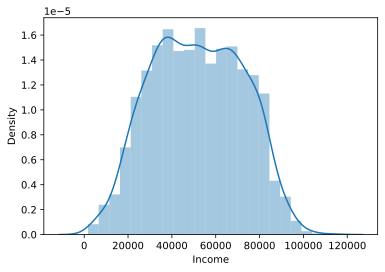

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

sns.distplot(df[df['Income']<300000]['Income'])

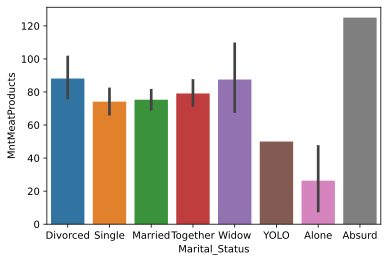

In [ ]:
sns.regplot(x=df['Income'], y=df['MntFishProducts'])
sns.barplot(x='Marital_Status', y='MntFishProduct', data=df)
sns.barplot(x='Marital_Status', y='MntFruits', data=df)
sns.barplot(x='Marital_Status', y='MntMeatProducts', data=df)

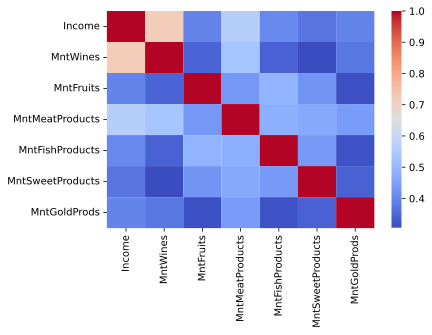

In [ ]:
ints = ['Income','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
sns.heatmap(df[ints].corr(), cmap='coolwarm')

Задание 7 (1 балл): немного исследований
Попробуйте найти в данных какую-то классную интересную особенность. Может быть, рыбу едят только неженатые? Или самый большой заработок и потребление фруктов у людей без образования? Приведите все расчеты, и визуализации для обнаруженного факта. Он должен быть правда интересным и удивлять! Попробуйте описать, почему (как вам кажется) так получилось.

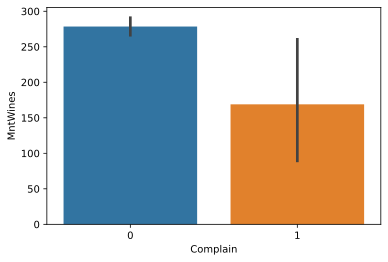

In [ ]:
categ_vars = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain']
quant_vars = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
sns.barplot(x='Complain', y='MntWines', data=df)

In [ ]:
stats = list(df['Marital_Status'].unique())
for i in stats:
  print(i + ' count is:', (df['Marital_Status']==i).sum())

Divorced count is: 232
Single count is: 480
Married count is: 864
Together count is: 580
Widow count is: 77
YOLO count is: 2
Alone count is: 3
Absurd count is: 2
